In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
def make_covariance_matrix(data):
  returns = data.pct_change().dropna()
  cov_matrix = returns.cov()
  return cov_matrix

In [ ]:
xlu = yf.Ticker("XLU")
xlu.info

{'longBusinessSummary': 'In seeking to track the performance of the index, the fund employs a replication strategy. It generally invests substantially all, but at least 95%, of its total assets in the securities comprising the index. The index includes securities of companies from the following industries: electric utilities; water utilities; multi-utilities; independent power and renewable electricity producers; and gas utilities. The fund is non-diversified.',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 61.3,
 'open': 61.0,
 'dayLow': 60.63,
 'dayHigh': 61.515,
 'regularMarketPreviousClose': 61.3,
 'regularMarketOpen': 61.0,
 'regularMarketDayLow': 60.63,
 'regularMarketDayHigh': 61.515,
 'trailingPE': 21.542387,
 'volume': 14862988,
 'regularMarketVolume': 14862988,
 'averageVolume': 16063618,
 'averageVolume10days': 16634590,
 'averageDailyVolume10Day': 16634590,
 'bid': 60.89,
 'ask': 61.24,
 'bidSize': 4000,
 'askSize': 3200,
 'yield': 0.0349,
 'totalAssets': 12803723264

In [ ]:
def fetch_xlu_data():

  xlu_data = yf.download("XLU", start='2024-02-01', end='2024-02-09', interval='1d')

  # get the XLU constituents (top five stocks in the etf?)

  # xlu_top_consts = yf.Ticker('XLU').major_holders().index.tolist()
  xlu_top_consts = ["NEE", "SO", "DUK", "SRE", "AEP", "AAPL"]

  constituent_data = {}

  for ticker in xlu_top_consts:
    constituent_data[ticker] = yf.download(ticker, start='2024-02-01', end='2024-02-09', interval='1d')['Close']
    # ^ closing time values for each of the consts in XLU etf
    print(constituent_data[ticker])


  return xlu_data['Close'], constituent_data


xlu_close_price, constituent_data = fetch_xlu_data()

covariance_matrices = {}

for ticker, data in constituent_data.items():

  # combine XLU and const data:

  combined_data = pd.concat([xlu_close_price, data], axis=1)
  combined_data.columns = ['XLU', ticker]

  #calculate covaraince matrix

  covariance_matrices[ticker] = make_covariance_matrix(combined_data)

print("\nPRINTING EACH TICKER'S COVARIANCE MATRICES:\n")

for ticker, cov_matrix in covariance_matrices.items():
  print(f"COVARIANCE MATRIX FOR {ticker}: \n{cov_matrix}\n")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Date
2024-02-01    59.750000
2024-02-02    58.150002
2024-02-05    55.970001
2024-02-06    56.230000
2024-02-07    56.380001
2024-02-08    56.290001
Name: Close, dtype: float64


[*********************100%%**********************]  1 of 1 completed


Date
2024-02-01    70.500000
2024-02-02    68.650002
2024-02-05    67.180000
2024-02-06    67.400002
2024-02-07    66.949997
2024-02-08    66.940002
Name: Close, dtype: float64


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Date
2024-02-01    97.790001
2024-02-02    96.220001
2024-02-05    95.250000
2024-02-06    95.059998
2024-02-07    95.500000
2024-02-08    92.650002
Name: Close, dtype: float64
Date
2024-02-01    72.349998
2024-02-02    71.339996
2024-02-05    70.050003
2024-02-06    69.760002
2024-02-07    70.050003
2024-02-08    69.839996
Name: Close, dtype: float64


[*********************100%%**********************]  1 of 1 completed


Date
2024-02-01    79.690002
2024-02-02    78.629997
2024-02-05    76.800003
2024-02-06    77.230003
2024-02-07    77.330002
2024-02-08    75.940002
Name: Close, dtype: float64


[*********************100%%**********************]  1 of 1 completed

Date
2024-02-01    186.860001
2024-02-02    185.850006
2024-02-05    187.679993
2024-02-06    189.300003
2024-02-07    189.410004
2024-02-08    188.320007
Name: Close, dtype: float64

PRINTING EACH TICKER'S COVARIANCE MATRICES:

COVARIANCE MATRIX FOR NEE: 
          XLU       NEE
XLU  0.000119  0.000201
NEE  0.000201  0.000367

COVARIANCE MATRIX FOR SO: 
          XLU        SO
XLU  0.000119  0.000125
SO   0.000125  0.000170

COVARIANCE MATRIX FOR DUK: 
          XLU       DUK
XLU  0.000119  0.000066
DUK  0.000066  0.000177

COVARIANCE MATRIX FOR SRE: 
          XLU       SRE
XLU  0.000119  0.000086
SRE  0.000086  0.000080

COVARIANCE MATRIX FOR AEP: 
          XLU       AEP
XLU  0.000119  0.000119
AEP  0.000119  0.000155

COVARIANCE MATRIX FOR AAPL: 
           XLU      AAPL
XLU   0.000119  0.000008
AAPL  0.000008  0.000055



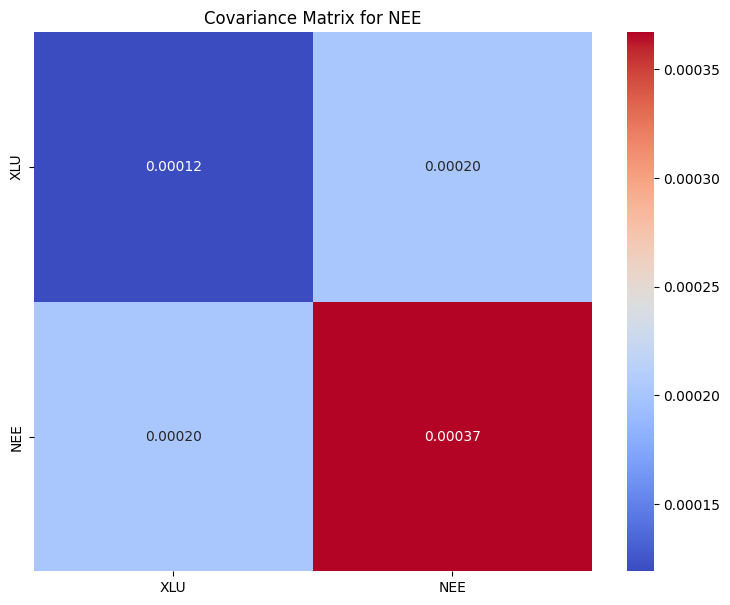

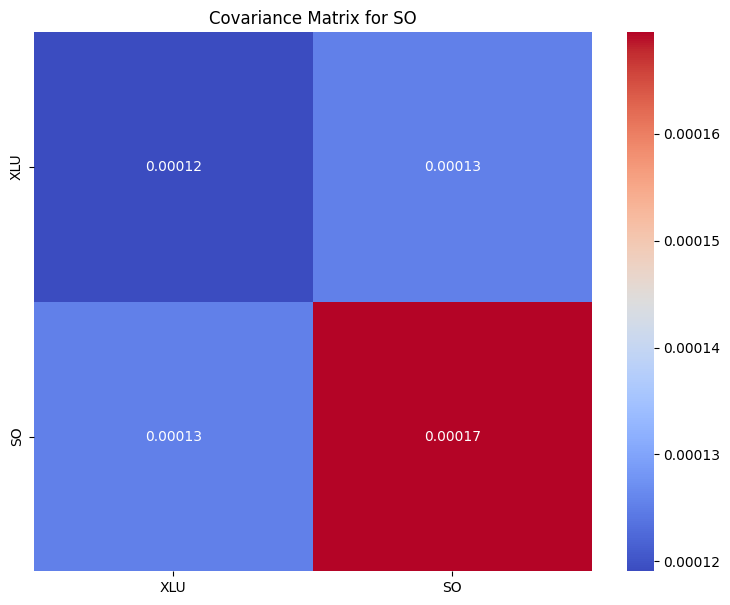

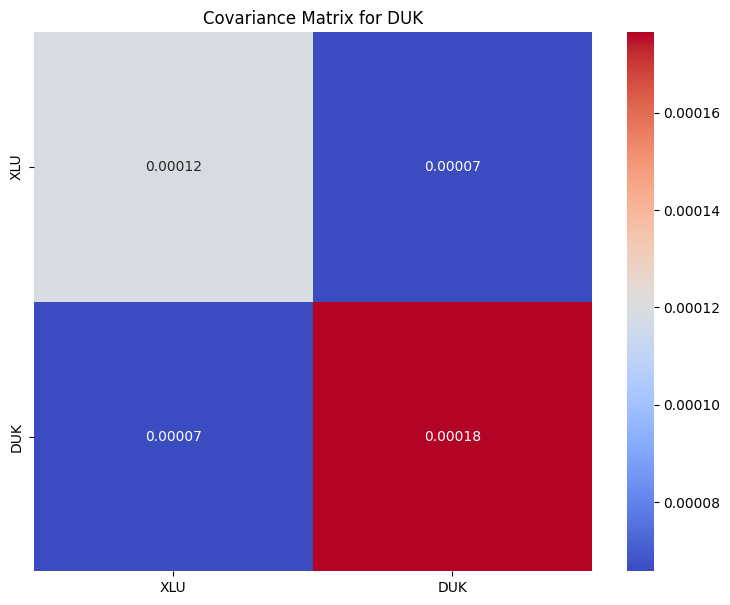

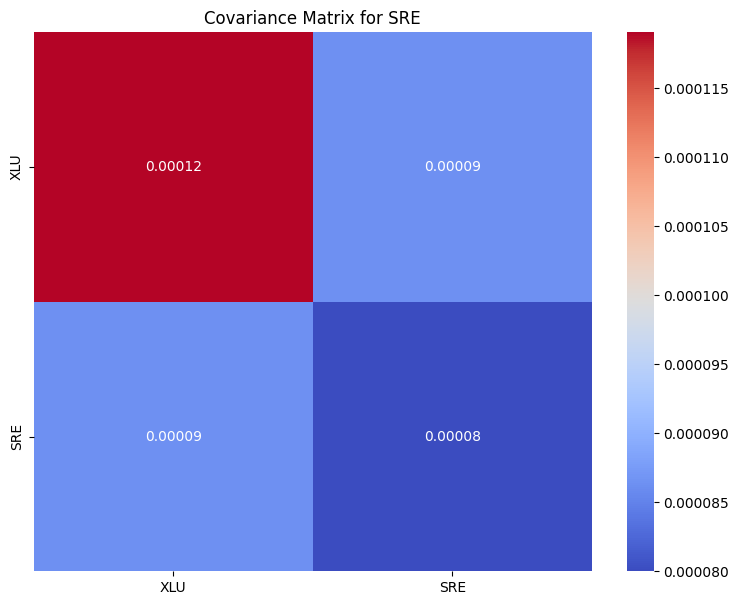

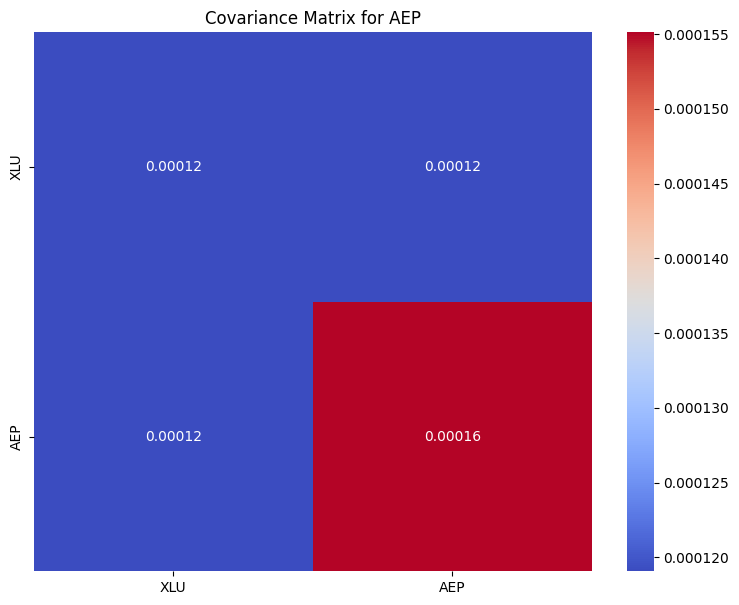

In [ ]:
# VISUALIZATION
for ticker, cov_matrix in  covariance_matrices.items():
  plt.figure(figsize=(9,7))
  # sns.displot(cov_matrix, annot=True)
  sns.heatmap(cov_matrix, annot=True, cmap='coolwarm',fmt=".5f")
  plt.title(f"Covariance Matrix for {ticker}")
  # plt.xlabel("XLU Stock?")
  # plt.ylabel(f"{ticker} Stock?")
  plt.show()

# THINGS TO REMEMBER ABOUT COVARIANCE
- On diagonal ements = variance
- Off diagonal elements = covariance

A + covariance indicates that 2 variables have a positive relationship, and vice versa.


*How is covariance calculated? (For 2 datasets - XLU and ONE constituent)*
1. find mean of one variable
2. find mean-squared diff
3. divivide this value by **1 LESS THAN** the total num of elements for first variable
4. Repeat for other variable